In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Generating the Dataset

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random data for x1, x2, x3
x1 = 2 * np.random.rand(1000, 1)
x2 = 3 * np.random.rand(1000, 1)
x3 = 4 * np.random.rand(1000, 1)

# Generate random noise
noise = np.random.randn(1000, 1) * 0.5

# Generate y values with a polynomial relationship using x1, x2, x3
y = 2 + 3 * x1**2 + 0.5 * x1**3 + 2 * x2**4 + 1.5 * x3 + noise

# Create a DataFrame with multiple features
data = pd.DataFrame({
    'X1': x1.flatten(),
    'X2': x2.flatten(),
    'X3': x3.flatten(),
    'Y': y.flatten()
})

# Display the first few rows of the DataFrame
print(data.head())


         X1        X2        X3           Y
0  0.749080  0.555399  1.046823    6.184033
1  1.901429  1.625703  0.987915   32.043854
2  1.463988  2.618838  3.625018  109.850777
3  1.197317  2.196675  0.998185   54.541796
4  0.312037  2.419683  1.087799   73.103921


# EDA

<Axes: ylabel='Density'>

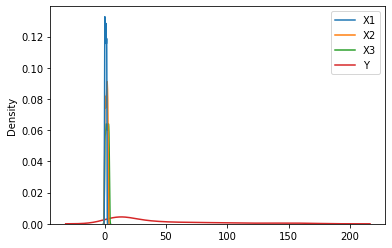

In [4]:
sns.kdeplot(data)

<Axes: >

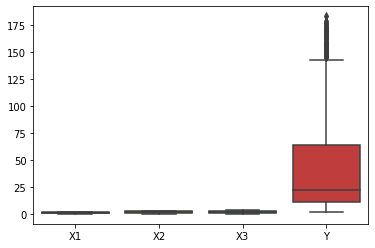

In [5]:
sns.boxplot(data)

<Axes: >

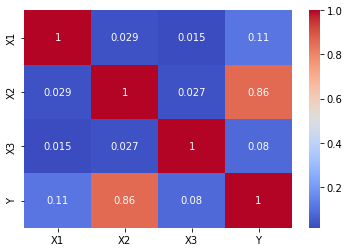

In [6]:
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [11]:
X = data.drop('Y', axis=1)
y = data['Y']

X.shape, y.shape

((1000, 3), (1000,))

In [12]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a polynomial regression model
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Transform the test set features
X_test_poly = poly_features.transform(X_test)

# Make predictions on the test set
y_pred = poly_model.predict(X_test_poly)



In [14]:
normal_model =  LinearRegression()
normal_model.fit(X, y)
normal_model.score(X, y)

0.7466288172717543

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'For Test : MSE {mean_squared_error(y_test, y_pred)}, R2 {r2_score(y_test, y_pred)}')


For Test : MSE 39.884475760073556, R2 0.9772458288486305


In [30]:
poly_model.score(X_poly,y)

0.9795875008812331